# T-SNE (no autoencoder)

In [2]:
# Author: Vivian Wong
# Modified from Code by Sherlock Liao available at https://github.com/L1aoXingyu/pytorch-beginner?files=1

import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

In [7]:
def load_meltpool_dataset():
    root = './08-AutoEncoder/data/meltpool/Meltpool_Camera_(partial)'
    batch_size = 128
    
    transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.CenterCrop(70),
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    
    dataset = torchvision.datasets.ImageFolder(root=root, transform=transform)
    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True
    )
    return dataset, dataloader

def load_MNIST_dataset():
    batch_size = 128
    
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    
    dataset = MNIST('./08-AutoEncoder/data', transform=transform, download=False)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataset, dataloader

In [8]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

dataset, dataloader = load_meltpool_dataset()
# dataset, dataloader = load_MNIST_dataset()

In [9]:
def plot2D_with_labels(XY, labels, num_labels=9):
    if type(XY)==torch.Tensor:
        XY = XY.numpy()
    plt.cla()
    X, Y = XY[:, 0], XY[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / num_labels)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.show(); plt.pause(0.01)

In [10]:
def plot3D_with_labels(XYZ, labels, num_labels=9):
    if type(XYZ)==torch.Tensor:
        XYZ = XYZ.numpy()
    fig = plt.figure(2); ax = Axes3D(fig)
    X, Y, Z = XYZ[:, 0].numpy(), XYZ[:, 1].numpy(), XYZ[:, 2].numpy() # put encoded data to [x,y,z]
    digits = train_data.train_labels[:200].numpy()
    for x, y, z, s in zip(X, Y, Z, digits):
        c = cm.rainbow(int(255*s/num_labels)); ax.text(x, y, z, s, backgroundcolor=c)
    ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
    plt.show()

In [11]:
def plot2D_with_thumbnails(XY, labels, thumbnails, num_labels = 9, cmap = None):
    def getThumbnail(path):
        return OffsetImage(plt.imread(path), zoom=0.5, cmap=cmap)

    if type(XY)==torch.Tensor:
        XY = XY.numpy()
#     plt.cla()
    X, Y = XY[:, 0], XY[:, 1]
    fig, ax = plt.subplots(figsize=(20,20))
    ax.scatter(X, Y) 
    for x, y, s, path in zip(X, Y, labels, thumbnails):
        ab = AnnotationBbox(getThumbnail(path), (x, y), frameon=True)
        ax.add_artist(ab)
#         c = cm.rainbow(int(255 * s / num_labels))
#         plt.text(x, y, s, backgroundcolor=c, fontsize=9)
#         plt.scatter(x, y, marker=path)
#     plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.show(); plt.pause(0.01)
    
  

## Get 200 data to be clustered

### Meltpool

In [12]:
num_viewed = 200
random_seed = 1
indices = list(range(len(dataset)))
np.random.seed(random_seed)
np.random.shuffle(indices)
view_indices = indices[:num_viewed]
# initialize empty arrays/tensors
view_data = torch.empty(num_viewed, 28*28)
view_data_layers = np.random.randint(1, size=num_viewed)

view_thumbnails = [dataset.imgs[i][0] for i in view_indices]
for i in range(num_viewed):
    view_data[i,:] = dataset[view_indices[i]][0].view(-1,28*28)
    view_data_layers[i] = int(dataset[view_indices[i]][1])

### MNIST

In [ ]:
num_viewed = 200
view_indices = list(range(len(dataset)))
# initialize empty arrays/tensors
view_data = torch.empty(num_viewed, 28*28)
digits = np.random.randint(1, size=num_viewed)

for i in range(num_viewed):
    view_data[i,:] = dataset[view_indices[i]][0].view(-1,28*28)
    digits[i] = dataset[view_indices[i]][1]

#### View encoder output using T-SNE

# T-SNE

## Meltpool

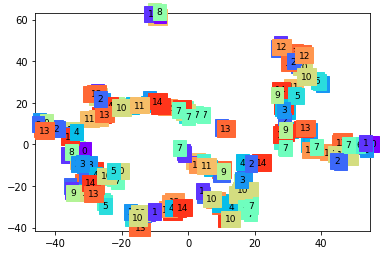

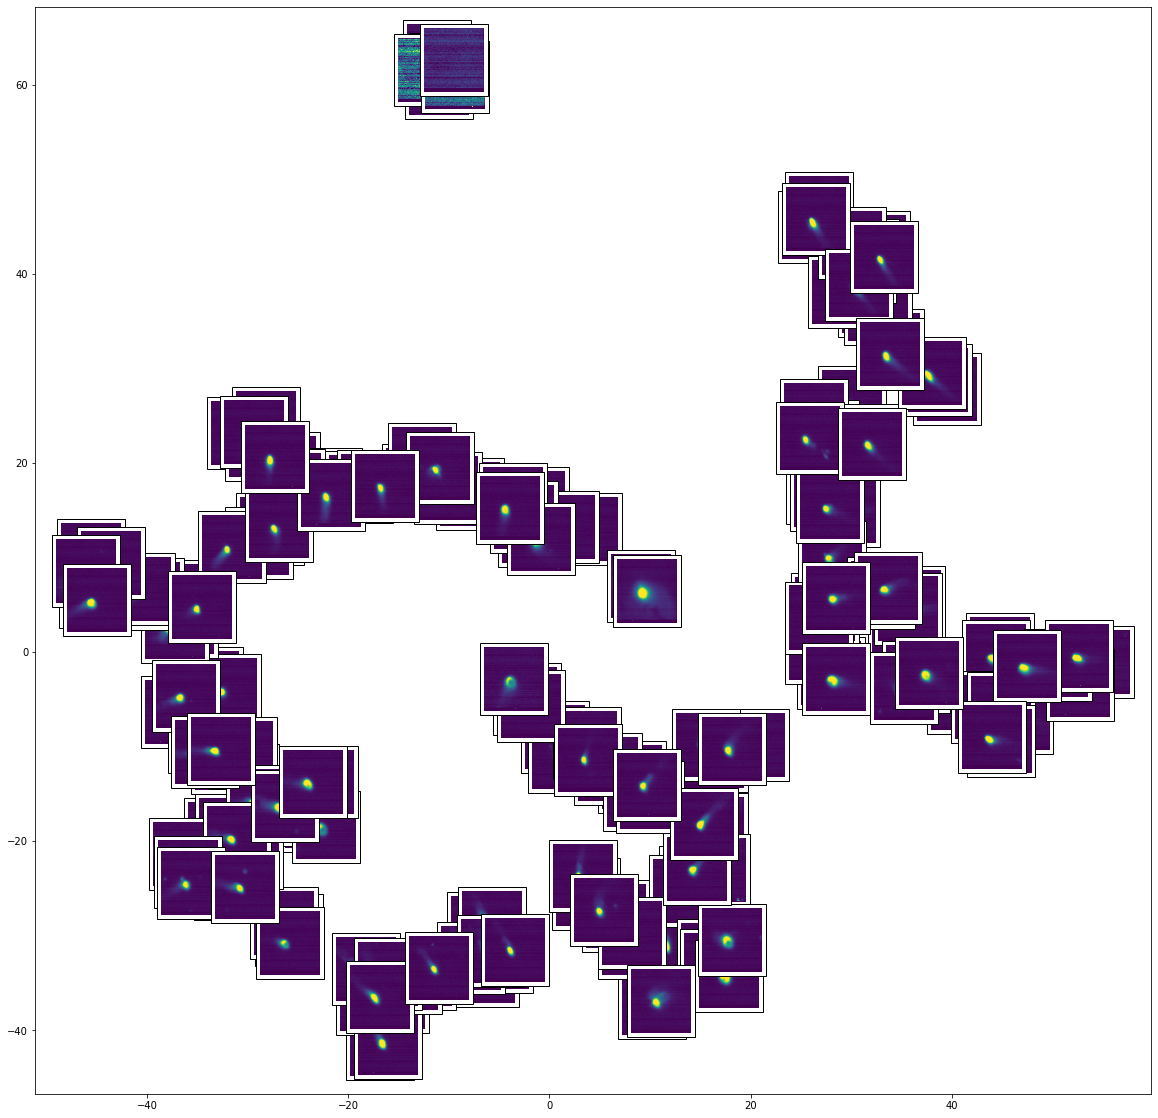

In [16]:
X = view_data # shape = (nsamples,nfeatures) = (200, 784)
X_embedded = TSNE(n_components=2, perplexity=5, init='pca', n_iter=1000).fit_transform(X)
X_embedded.shape
plot2D_with_labels(X_embedded, view_data_layers, num_labels = 15)
plot2D_with_thumbnails(X_embedded, view_data_layers, view_thumbnails, num_labels = 15)

## MNIST

In [ ]:
X = view_data # shape = (nsamples,nfeatures) = (200, 784)
X_embedded = TSNE(n_components=2, perplexity=5, init='pca', n_iter=1000).fit_transform(X)
X_embedded.shape

In [ ]:
plot2D_with_labels(X_embedded, digits)